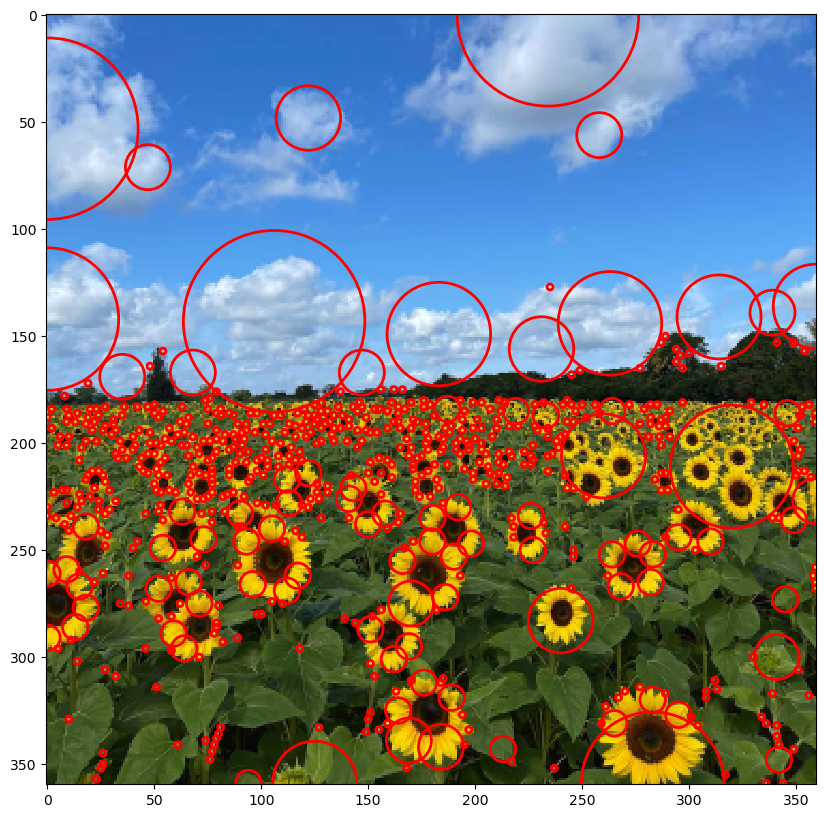

Largest circles (y, x, radius):
[[142.           0.          33.31258614]
 [359.         283.          33.31258614]
 [  0.         234.          42.42640687]
 [ 53.           0.          42.42640687]
 [143.         106.          42.42640687]]


In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log

# Load the sunflower field image
im = cv.imread('../images/the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

# Convert to grayscale for blob detection
gray_im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Apply Laplacian of Gaussian (LoG) to detect blobs
blobs_log = blob_log(gray_im, max_sigma=30, num_sigma=10, threshold=0.1)

# Compute radii in the 3rd column (σ * sqrt(2))
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

# Plot the original image with detected blobs
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# ax.imshow(im, interpolation='nearest')
ax.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB), interpolation='nearest')
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)
plt.show()

# Report largest circles
largest_blobs = blobs_log[blobs_log[:, 2].argsort()[-5:]]
print("Largest circles (y, x, radius):")
print(largest_blobs)
